In [ ]:
import json
import matplotlib.pyplot as plt


In [ ]:
with open("ewc_metrics.json") as f:
    ewc_metrics = json.load(f)

with open("replay_metrics.json") as f:
    replay_metrics = json.load(f)

with open("dynamic_metrics.json") as f:
    dynamic_metrics = json.load(f)


In [ ]:
def get_stream_accuracy(metrics):
    for k, v in metrics.items():
        if "Top1_Acc_Stream/eval_phase/test_stream" in k:
            return v
    return None


def get_stream_forgetting(metrics):
    for k, v in metrics.items():
        if "StreamForgetting/eval_phase/test_stream" in k:
            return v
    return None


def get_experience_accuracies(metrics):
    exp_acc = {}
    for k, v in metrics.items():
        if "Top1_Acc_Exp/eval_phase/test_stream" in k:
            exp_id = int(k.split("Exp")[-1])
            exp_acc[exp_id] = v
    return exp_acc


In [ ]:
def to_float(x):
    while isinstance(x, (list, tuple)):
        x = x[0]
    try:
        return float(x)
    except Exception:
        return float(x.item())

In [ ]:
stream_acc = [
    to_float(get_stream_accuracy(ewc_metrics)),
    to_float(get_stream_accuracy(replay_metrics)),
    to_float(get_stream_accuracy(dynamic_metrics))
]

stream_forgetting = [
    to_float(get_stream_forgetting(ewc_metrics)),
    to_float(get_stream_forgetting(replay_metrics)),
    to_float(get_stream_forgetting(dynamic_metrics))
]


In [ ]:
plt.figure()
plt.bar(methods, stream_acc)
plt.ylabel("Average Stream Accuracy")
plt.title("Comparison of Continual Learning Methods")
plt.ylim(0, 1)
plt.show()


NameError: name 'methods' is not defined

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.figure()
plt.bar(methods, stream_forgetting)
plt.ylabel("Forgetting")
plt.title("Forgetting Across Continual Learning Methods")
plt.show()


TypeError: only length-1 arrays can be converted to Python scalars

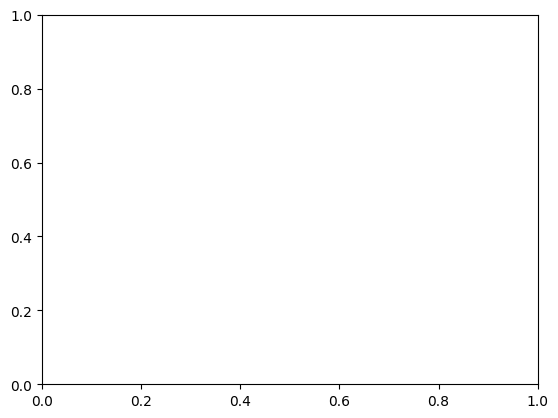

In [ ]:
ewc_exp = get_experience_accuracies(ewc_metrics)
replay_exp = get_experience_accuracies(replay_metrics)
dynamic_exp = get_experience_accuracies(dynamic_metrics)

exp_ids = sorted(ewc_exp.keys())
plt.figure()
plt.bar(exp_ids, [ewc_exp[i] for i in exp_ids])
plt.xlabel("Experience")
plt.ylabel("Accuracy")
plt.title("EWC: Accuracy per Experience")
plt.ylim(0, 1)
plt.show()

plt.figure()
plt.bar(exp_ids, [replay_exp[i] for i in exp_ids])
plt.xlabel("Experience")
plt.ylabel("Accuracy")
plt.title("Replay: Accuracy per Experience")
plt.ylim(0, 1)
plt.show()

plt.figure()
plt.bar(exp_ids, [dynamic_exp[i] for i in exp_ids])
plt.xlabel("Experience")
plt.ylabel("Accuracy")
plt.title("Dynamic Model: Accuracy per Experience")
plt.ylim(0, 1)
plt.show()


In [ ]:
for name, acc, forget in zip(methods, stream_acc, stream_forgetting):
    print(f"{name:8s} | Stream Acc: {acc:.3f} | Forgetting: {forget:.3f}")


Files loaded successfully.


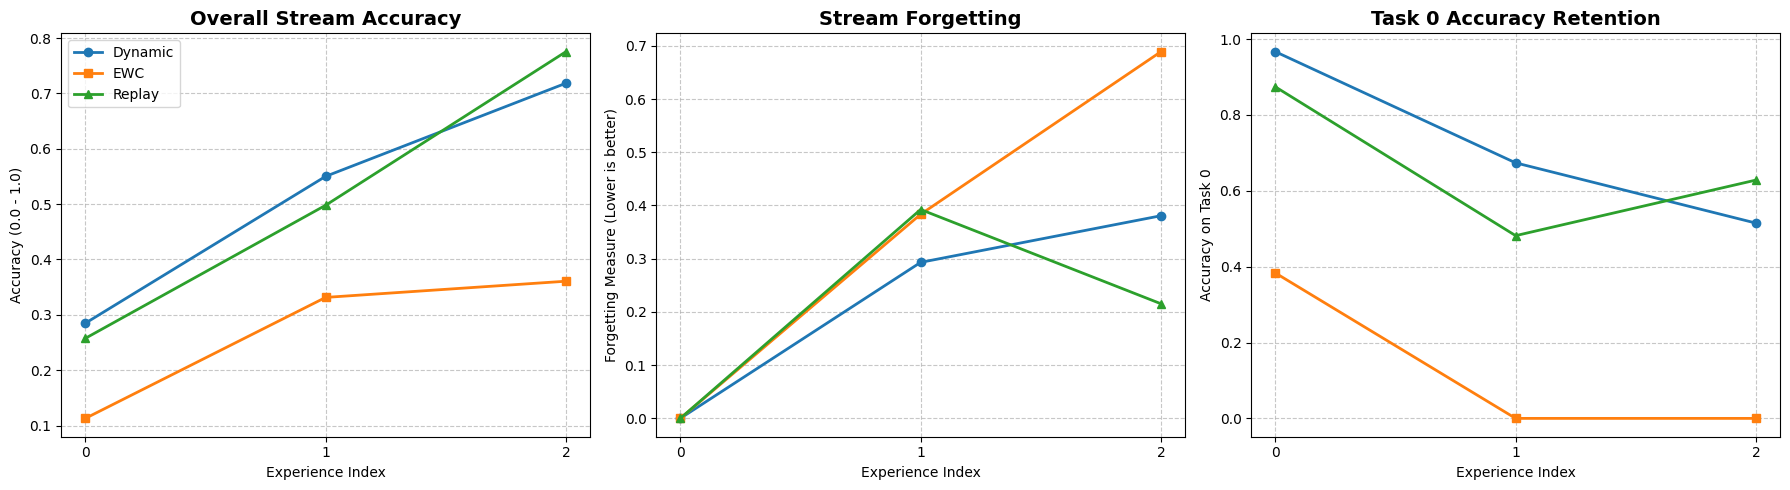

In [ ]:
import json
import matplotlib.pyplot as plt
import numpy as np

# 1. Load the data
def load_metrics(filename):
    with open(filename, 'r') as f:
        return json.load(f)

try:
    dynamic_data = load_metrics('dynamic_metrics.json')
    ewc_data = load_metrics('ewc_metrics.json')
    replay_data = load_metrics('replay_metrics.json')
    print("Files loaded successfully.")
except FileNotFoundError as e:
    print(f"Error: {e}. Please ensure you have uploaded the JSON files to Colab.")

# 2. Extract relevant metrics for comparison
# We use the index [0, 1, 2] as the 'Experience' number for a fair comparison
methods = {
    'Dynamic': dynamic_data,
    'EWC': ewc_data,
    'Replay': replay_data
}

# Define the keys we want to plot
# Note: Task IDs vary slightly in your JSON keys, so we'll fetch them dynamically
metrics_to_plot = {
    'Stream Accuracy': {
        'dynamic': 'Top1_Acc_Stream/eval_phase/test_stream/Task002',
        'ewc': 'Top1_Acc_Stream/eval_phase/test_stream/Task000',
        'replay': 'Top1_Acc_Stream/eval_phase/test_stream/Task000'
    },
    'Stream Forgetting': {
        'all': 'StreamForgetting/eval_phase/test_stream'
    },
    'Task 0 Accuracy (Stability)': {
        'all': 'Top1_Acc_Exp/eval_phase/test_stream/Task000/Exp000'
    }
}

# 3. Create Visualizations
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
colors = {'Dynamic': '#1f77b4', 'EWC': '#ff7f0e', 'Replay': '#2ca02c'}
markers = {'Dynamic': 'o', 'EWC': 's', 'Replay': '^'}

# Plot 1: Stream Accuracy
ax = axes[0]
for name, data in methods.items():
    key = metrics_to_plot['Stream Accuracy'].get(name.lower(), metrics_to_plot['Stream Accuracy']['ewc'])
    vals = data[key][1]
    ax.plot(range(len(vals)), vals, label=name, color=colors[name], marker=markers[name], linewidth=2)
ax.set_title('Overall Stream Accuracy', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy (0.0 - 1.0)')
ax.set_xlabel('Experience Index')
ax.set_xticks([0, 1, 2])
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend()

# Plot 2: Stream Forgetting
ax = axes[1]
for name, data in methods.items():
    key = metrics_to_plot['Stream Forgetting']['all']
    vals = data[key][1]
    ax.plot(range(len(vals)), vals, label=name, color=colors[name], marker=markers[name], linewidth=2)
ax.set_title('Stream Forgetting', fontsize=14, fontweight='bold')
ax.set_ylabel('Forgetting Measure (Lower is better)')
ax.set_xlabel('Experience Index')
ax.set_xticks([0, 1, 2])
ax.grid(True, linestyle='--', alpha=0.7)

# Plot 3: Stability of Task 0
ax = axes[2]
for name, data in methods.items():
    key = metrics_to_plot['Task 0 Accuracy (Stability)']['all']
    vals = data[key][1]
    ax.plot(range(len(vals)), vals, label=name, color=colors[name], marker=markers[name], linewidth=2)
ax.set_title('Task 0 Accuracy Retention', fontsize=14, fontweight='bold')
ax.set_ylabel('Accuracy on Task 0')
ax.set_xlabel('Experience Index')
ax.set_xticks([0, 1, 2])
ax.grid(True, linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()